In [928]:
# autoreload
%load_ext autoreload
%autoreload 2

# fix path
import sys
sys.path.append("/home/jxm/reverse-training")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [937]:
from utils.analysis import load_results_as_df
import os


HOME_DIR = "/home/jxm/reverse-training"
df = load_results_as_df(os.path.join(HOME_DIR, "results", "03-27-main-exp"))
df["seed_dataset_size"] = df["select_seed_dataset"].str.extract(r"(\d+)").astype(int)


Found 236 files in /home/jxm/reverse-training/results/03-27-main-exp/*.pkl
Filtered 0/236 results with no evaluation metrics
dict_keys(['data', 'time_elapsed', 'full_ot_distance', 'sinkhorn_distance', 'optimal_matching_relaxed_wmd', 'jaccard_overlap_examples', 'jaccard_overlap_vocabulary', 'containment_similarity_examples', 'containment_similarity_vocabulary', 'levenshtein_stats', 'discrete_ot_distance_levenshtein', 'discrete_ot_distance_jaccard', 'args', 'expert_evaluation_metrics', 'evaluation_metrics', 'total_time_in_evaluation'])


In [940]:
df["base_model_name_or_path"].value_counts()

base_model_name_or_path
gpt2    236
Name: count, dtype: int64

In [939]:
import pandas as pd

pd.set_option('display.max_rows', None)

dv_cols = ["dataset", "base_model_name_or_path"]

iv_cols = ["evaluation_best_eval_accuracy", "dataset_sinkhorn_distance", "dataset_full_ot_distance", "dataset_jaccard_overlap_vocabulary"]

# final_df = df[df["select_seed_dataset"] == "nq_500000"]

df.groupby(dv_cols)[iv_cols].mean().sort_values(
    by=dv_cols, 
    ascending=False
)["evaluation_best_eval_accuracy"]

dataset        base_model_name_or_path
dbpedia_10000  gpt2                       0.360192
ag_news_10000  gpt2                       0.578377
Name: evaluation_best_eval_accuracy, dtype: float64

In [933]:
df["select_full_dataset_size"].value_counts()

select_full_dataset_size
1000    11
Name: count, dtype: int64

In [779]:
df["select_seed_dataset"].value_counts()

select_seed_dataset
nq_4000 ag_news_6000    12
nq_6000 ag_news_4000    12
nq_10000                12
nq_5000 ag_news_5000    12
ag_news_10000           12
nq_2000 ag_news_8000    12
nq_7000 ag_news_3000    12
nq_1000 ag_news_9000    12
nq_8000 ag_news_2000    12
nq_3000 ag_news_7000    12
nq_9000 ag_news_1000    11
Name: count, dtype: int64

In [791]:
import functools
import re

def extract_size(prefix: str, x: str):  
    try:
        return int(re.search(rf"{prefix}_(\d+)", x).group(1))
    except:
        return 0

df["nq_size"] = df["select_seed_dataset"].apply(functools.partial(extract_size, "nq"))
df["ag_news_size"] = df["select_seed_dataset"].apply(functools.partial(extract_size, "ag_news"))

df["ratio"] = 1.0 - df["nq_size"] / df["nq_size"].max()
df["ratio"].value_counts()


ratio
0.6    12
0.4    12
0.0    12
0.5    12
1.0    12
0.8    12
0.3    12
0.9    12
0.2    12
0.7    12
0.1    11
Name: count, dtype: int64

/tmp/ipykernel_3555751/1161964431.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(loc='upper right', bbox_to_anchor=(1, 0.9))
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' no

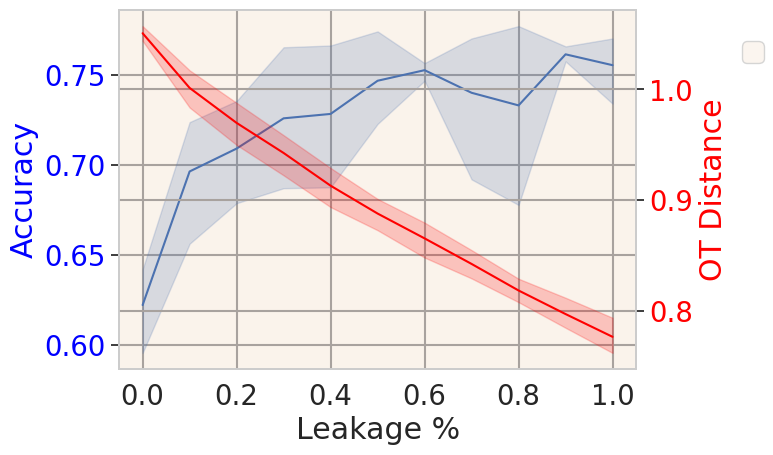

In [804]:


dv_cols = ["ratio"]

iv_cols = ["evaluation_best_eval_accuracy", "dataset_full_ot_distance"]


# Final results: dataset size 1000, batch fill strategy is not bottomk
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot first line (accuracy) on primary y-axis
dfg = df[df["select_batch_fill_strategy"] == "topk_balanced"]
sns.lineplot(data=dfg, x="ratio", y="evaluation_best_eval_accuracy", ax=ax1)
ax1.set_xlabel('Leakage %')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary y-axis and plot second line (OT distance)
ax2 = ax1.twinx()
sns.lineplot(data=df, x="ratio", y="dataset_full_ot_distance", ax=ax2, color="red")
ax2.set_ylabel('OT Distance', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legend
fig.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

plt.tight_layout()
plt.show()